In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Importing dataset

In [2]:
train_data = pd.read_csv("Vegetable and Fruits Prices in India.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Datesk,Item_Name,Date,Price
0,20110101,Kashini greens,1/1/2011,NaN
1,20110101,Pineapple juice,1/1/2011,NaN
2,20110101,Thiland Juice,1/1/2011,NaN
3,20110101,Thiland Jelly,1/1/2011,NaN
4,20110101,Orange juice,1/1/2011,NaN


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868965 entries, 0 to 868964
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Datesk     868965 non-null  int64  
 1   Item_Name  861126 non-null  object 
 2   Date       868965 non-null  object 
 3   Price      551948 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 26.5+ MB


In [6]:
train_data.dropna(inplace = True)

In [7]:
train_data.isnull().sum()

Datesk       0
Item_Name    0
Date         0
Price        0
dtype: int64

In [8]:
train_data["Month"] = pd.to_datetime(train_data.Datesk, format="%Y%m%d").dt.month

In [9]:
train_data["Day"] = pd.to_datetime(train_data.Datesk, format="%Y%m%d").dt.day

In [10]:
train_data.head()

,Datesk,Item_Name,Date,Price,Month,Day
296,20110101,Sponge Gourd,1/1/2011,32.0,1,1
22311,20110309,Berry Southafrica,9/3/2011,0.0,3,9
22312,20110309,Baby corn cleaned,9/3/2011,56.0,3,9
22313,20110309,Baby corn,9/3/2011,14.0,3,9
22314,20110309,Chillies Bajji yagani,9/3/2011,0.0,3,9


In [11]:
train_data.drop(["Datesk","Date"], axis = 1, inplace = True)

In [12]:
train_data.head()

,Item_Name,Price,Month,Day
296,Sponge Gourd,32.0,1,1
22311,Berry Southafrica,0.0,3,9
22312,Baby corn cleaned,56.0,3,9
22313,Baby corn,14.0,3,9
22314,Chillies Bajji yagani,0.0,3,9


# New Section

In [13]:
train_data.drop(train_data[train_data['Price'] == 0].index, inplace = True)

In [14]:
train_data.head()

,Item_Name,Price,Month,Day
296,Sponge Gourd,32.0,1,1
22312,Baby corn cleaned,56.0,3,9
22313,Baby corn,14.0,3,9
22315,Chilakarive green,22.0,3,9
22318,Chakota greens,21.0,3,9


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395650 entries, 296 to 868964
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Item_Name  395650 non-null  object 
 1   Price      395650 non-null  float64
 2   Month      395650 non-null  int64  
 3   Day        395650 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 15.1+ MB


In [16]:
items = set(list(train_data['Item_Name']))

In [17]:
count = 0
for item in items:
  if (train_data['Item_Name'] == item).sum() != 2048:
    train_data.drop(train_data[train_data['Item_Name'] == item].index, inplace = True)

In [18]:
Item_Name = train_data[["Item_Name"]]

Item_Name = pd.get_dummies(Item_Name, drop_first= True)

Item_Name.head()

,Item_Name_Arive greens,Item_Name_Banana cooking R.Banana,Item_Name_Basale Greens,Item_Name_Beet Root,Item_Name_Brinjal (R),Item_Name_Brinjal (W),Item_Name_Brinjal Bottle,Item_Name_Brucoli,Item_Name_Cabbage,Item_Name_Cabbage Red,Item_Name_Cabbage chaina,Item_Name_Capsicum Red/Yellow,Item_Name_Cauliflower(M),Item_Name_Chakota greens,Item_Name_Chikadi kai,Item_Name_Chillies Green,Item_Name_Chillies small (C.B.P),Item_Name_Chow-Chow,Item_Name_Coconut (B),Item_Name_Coconut (M),Item_Name_Coconut (OS),Item_Name_Coconut (S),Item_Name_Copra,Item_Name_Dry dates,Item_Name_Eggs,Item_Name_Garlic cleaned,Item_Name_Greens Sabbakki,Item_Name_Ground nut Local,Item_Name_Herali kai,Item_Name_Hesaru kalu,Item_Name_Jukani,Item_Name_Kakadi,Item_Name_Kiwi fruit,Item_Name_Leeks,Item_Name_Little gourd,Item_Name_Mangalore cucumber,Item_Name_Molake kalu,Item_Name_Mushroom Button,Item_Name_Onion samber,Item_Name_Palak Greens,Item_Name_Parsley,Item_Name_Pumpkin Ash,Item_Name_Pumpkin Japan,Item_Name_Pumpkin Red,Item_Name_Raddish,Item_Name_Selari,Item_Name_Sham gadde,Item_Name_Spring Onion,Item_Name_Sweet Potato(Genasu),Item_Name_Sweet corn,Item_Name_Tamarind seedless,Item_Name_Tender Coconut(S),Item_Name_Yam/S.Root,Item_Name_knol-khol
22318,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22320,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
data_train = pd.concat([train_data, Item_Name], axis=1)

In [20]:
data_train.head()

,Item_Name,Price,Month,Day,Item_Name_Arive greens,Item_Name_Banana cooking R.Banana,Item_Name_Basale Greens,Item_Name_Beet Root,Item_Name_Brinjal (R),Item_Name_Brinjal (W),Item_Name_Brinjal Bottle,Item_Name_Brucoli,Item_Name_Cabbage,Item_Name_Cabbage Red,Item_Name_Cabbage chaina,Item_Name_Capsicum Red/Yellow,Item_Name_Cauliflower(M),Item_Name_Chakota greens,Item_Name_Chikadi kai,Item_Name_Chillies Green,Item_Name_Chillies small (C.B.P),Item_Name_Chow-Chow,Item_Name_Coconut (B),Item_Name_Coconut (M),Item_Name_Coconut (OS),Item_Name_Coconut (S),Item_Name_Copra,Item_Name_Dry dates,Item_Name_Eggs,Item_Name_Garlic cleaned,Item_Name_Greens Sabbakki,Item_Name_Ground nut Local,Item_Name_Herali kai,Item_Name_Hesaru kalu,Item_Name_Jukani,Item_Name_Kakadi,Item_Name_Kiwi fruit,Item_Name_Leeks,Item_Name_Little gourd,Item_Name_Mangalore cucumber,Item_Name_Molake kalu,Item_Name_Mushroom Button,Item_Name_Onion samber,Item_Name_Palak Greens,Item_Name_Parsley,Item_Name_Pumpkin Ash,Item_Name_Pumpkin Japan,Item_Name_Pumpkin Red,Item_Name_Raddish,Item_Name_Selari,Item_Name_Sham gadde,Item_Name_Spring Onion,Item_Name_Sweet Potato(Genasu),Item_Name_Sweet corn,Item_Name_Tamarind seedless,Item_Name_Tender Coconut(S),Item_Name_Yam/S.Root,Item_Name_knol-khol
22318,Chakota greens,21.0,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22319,Eggs,3.1,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22320,Arive greens,24.0,3,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22321,knol-khol,17.0,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22322,Chikadi kai,30.0,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
data_train.drop(['Item_Name'], axis=1, inplace = True)

In [22]:
data_train.shape

(112640, 57)

In [23]:
data_train.columns

Index(['Price', 'Month', 'Day', 'Item_Name_Arive greens',
       'Item_Name_Banana cooking R.Banana', 'Item_Name_Basale Greens',
       'Item_Name_Beet Root', 'Item_Name_Brinjal (R)', 'Item_Name_Brinjal (W)',
       'Item_Name_Brinjal Bottle', 'Item_Name_Brucoli', 'Item_Name_Cabbage',
       'Item_Name_Cabbage Red', 'Item_Name_Cabbage chaina',
       'Item_Name_Capsicum Red/Yellow', 'Item_Name_Cauliflower(M)',
       'Item_Name_Chakota greens', 'Item_Name_Chikadi kai',
       'Item_Name_Chillies Green', 'Item_Name_Chillies small (C.B.P)',
       'Item_Name_Chow-Chow', 'Item_Name_Coconut (B)', 'Item_Name_Coconut (M)',
       'Item_Name_Coconut (OS)', 'Item_Name_Coconut (S)', 'Item_Name_Copra',
       'Item_Name_Dry dates', 'Item_Name_Eggs', 'Item_Name_Garlic cleaned',
       'Item_Name_Greens Sabbakki', 'Item_Name_Ground nut Local',
       'Item_Name_Herali kai', 'Item_Name_Hesaru kalu', 'Item_Name_Jukani',
       'Item_Name_Kakadi', 'Item_Name_Kiwi fruit', 'Item_Name_Leeks',
       'It

In [24]:
y = data_train.iloc[:, 0]
y.head()

22318    21.0
22319     3.1
22320    24.0
22321    17.0
22322    30.0
Name: Price, dtype: float64

In [25]:
columns = list(data_train.columns)
columns.remove('Price')
X = data_train.loc[:, columns]
X.head()

,Month,Day,Item_Name_Arive greens,Item_Name_Banana cooking R.Banana,Item_Name_Basale Greens,Item_Name_Beet Root,Item_Name_Brinjal (R),Item_Name_Brinjal (W),Item_Name_Brinjal Bottle,Item_Name_Brucoli,Item_Name_Cabbage,Item_Name_Cabbage Red,Item_Name_Cabbage chaina,Item_Name_Capsicum Red/Yellow,Item_Name_Cauliflower(M),Item_Name_Chakota greens,Item_Name_Chikadi kai,Item_Name_Chillies Green,Item_Name_Chillies small (C.B.P),Item_Name_Chow-Chow,Item_Name_Coconut (B),Item_Name_Coconut (M),Item_Name_Coconut (OS),Item_Name_Coconut (S),Item_Name_Copra,Item_Name_Dry dates,Item_Name_Eggs,Item_Name_Garlic cleaned,Item_Name_Greens Sabbakki,Item_Name_Ground nut Local,Item_Name_Herali kai,Item_Name_Hesaru kalu,Item_Name_Jukani,Item_Name_Kakadi,Item_Name_Kiwi fruit,Item_Name_Leeks,Item_Name_Little gourd,Item_Name_Mangalore cucumber,Item_Name_Molake kalu,Item_Name_Mushroom Button,Item_Name_Onion samber,Item_Name_Palak Greens,Item_Name_Parsley,Item_Name_Pumpkin Ash,Item_Name_Pumpkin Japan,Item_Name_Pumpkin Red,Item_Name_Raddish,Item_Name_Selari,Item_Name_Sham gadde,Item_Name_Spring Onion,Item_Name_Sweet Potato(Genasu),Item_Name_Sweet corn,Item_Name_Tamarind seedless,Item_Name_Tender Coconut(S),Item_Name_Yam/S.Root,Item_Name_knol-khol
22318,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22319,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22320,3,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22321,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22322,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [27]:
print(selection.feature_importances_)

[1.32363628e-02 8.25302662e-03 2.30850699e-04 5.58332698e-04
 3.29530453e-04 3.74412709e-04 5.73927305e-04 2.07442212e-04
 2.25486422e-04 8.98830060e-02 8.01867789e-04 3.93709045e-03
 3.01066947e-03 2.11589478e-02 5.64107163e-04 2.41789839e-04
 4.15637626e-04 2.45617292e-04 4.48089935e-03 4.01792781e-04
 6.30338796e-04 8.42934568e-04 1.34543018e-03 1.05202328e-03
 3.27789702e-02 2.81968914e-02 4.92642950e-03 4.46555748e-02
 2.86404968e-03 4.30695845e-03 3.10863918e-03 1.35447944e-02
 2.62614221e-02 2.91729491e-03 3.69472236e-01 4.54950311e-02
 6.36113221e-04 8.26819300e-04 6.61603865e-03 9.04492891e-02
 3.58032782e-03 2.83120343e-04 9.18211317e-02 1.00775976e-03
 1.03495506e-03 1.15185156e-03 5.98235974e-04 3.19603554e-02
 2.52080721e-03 3.07842799e-03 2.44317750e-04 2.82551666e-04
 3.07403995e-02 1.01982106e-03 3.16318714e-04 3.01542633e-04]


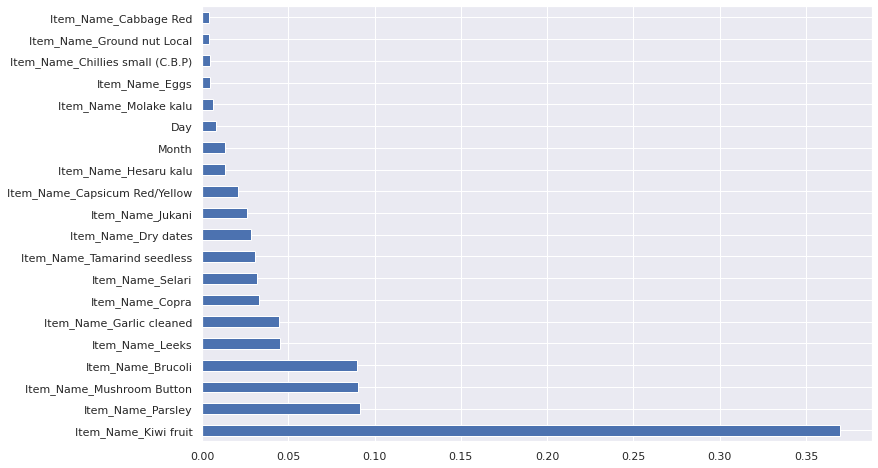

In [28]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
y_pred = reg_rf.predict(X_test)

In [32]:
reg_rf.score(X_train, y_train)

0.8849450539608918

In [33]:
reg_rf.score(X_test, y_test)

0.8009021959573318

/home/sachin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


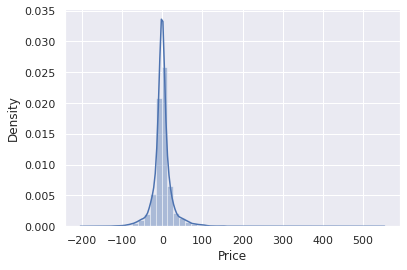

In [34]:
sns.distplot(y_test-y_pred)
plt.show()

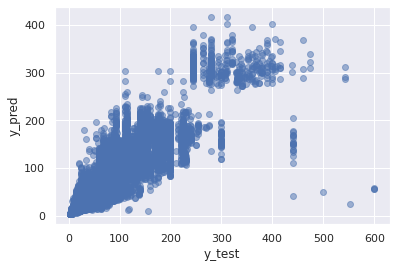

In [35]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [36]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 15.214102491672996
MSE: 722.0183709921898
RMSE: 26.870399531681507


In [38]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

3.4959045150501677

In [39]:
metrics.r2_score(y_test, y_pred)

0.8009021959573318

In [55]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [56]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [57]:
y_prediction = forest.predict(X_test)

In [59]:
metrics.r2_score(y_test, y_prediction)

0.8009021959573318